# Contents
- Data
- Logistic Regression
- Random Forest
- KNN
- K-means

# Imports

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Custom Functions

In [3]:
def plt_dgt(dgt, shp=(8, 8), ntrp='none'):
    '''
    Plot digit image
    '''    
    # reshape digit array
    shpd_dgt = dgt.reshape(shp[0], shp[1])
    # plot image of digit
    plt.imshow(shpd_dgt, interpolation=ntrp)

# Plot Settings

In [4]:
plt.rc('image', cmap='binary') # use black/white palette for plotting

# Data

## 8x8 Digits
Handwritten digits dataset with 8x8 (64 pixel) resolution

In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
X = digits.data
y = digits.target
classes = digits.target_names

In [8]:
# sample features
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

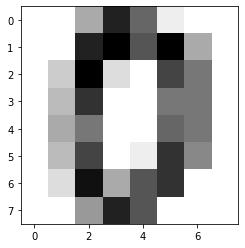

In [9]:
# sample feature image
plt_dgt(X[0])

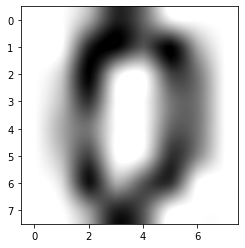

In [10]:
# sample observation image
plt_dgt(X[0], ntrp='spline16')

In [11]:
# sample target
y[0]

0

## 28x28 Digits
Handwritten digits dataset with 28x28 (784 pixel) resolution

In [5]:
from sklearn.datasets import fetch_mldata

In [6]:
mnist = fetch_mldata("MNIST original")
mnist.data.shape

(70000, 784)

In [16]:
# total number of samples for modeling
n = 500
# step to sample through data
step = int(len(mnist.target) / n)

In [17]:
# use subset of data for analysis
X = mnist.data[0::step].astype(float)
y = mnist.target[0::step].astype(float)
classes = np.unique(y).astype(int)

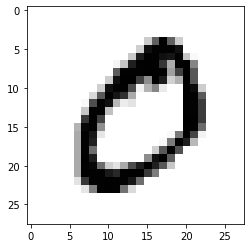

In [17]:
plt_dgt(X[0], (28, 28))

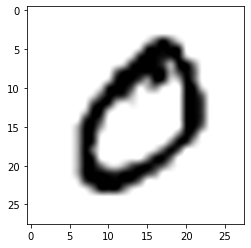

In [18]:
plt_dgt(X[0], (28, 28), ntrp='spline16')

In [19]:
y[0]

0.0

### Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

## Initial Model

In [14]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/home/kevcon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

In [15]:
# train score
log_reg.score(X_train, y_train)

1.0

## Tune Model

In [14]:
# scale model in pipeline
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=0))
])

In [18]:
# define hyperparameter ranges for modeling tuning
penalty_range = ['l2']
C_range = np.linspace(0.01, 100, 10)
# hyperparams = {'model__penalty': penalty_range, 'model__C': C_range}
hyperparams = {'model__penalty': penalty_range, 'model__C': C_range}
# hyperparams = {'model__C': C_range}

In [19]:
lr_search = GridSearchCV(lr_pipe, hyperparams, scoring='accuracy', cv=5)

In [20]:
lr_search.fit(X_train, y_train)

/home/kevcon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kevcon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/kevcon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kevcon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/kevcon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kevcon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
           

In [19]:
lr_search = GridSearchCV(lr_pipe, hyperparams, scoring='accuracy', cv=5)
lr_search.fit(X_train, y_train)

ValueError: Invalid parameter C for estimator Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [22]:
# best cv train score
lr_search.best_score_

0.9638135003479471

In [23]:
lr_search.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [24]:
lr_tune = lr_search.best_estimator_
lr_tune.score(X_test, y_test)

0.9611111111111111

In [26]:
lr_predict = lr_tune.predict(X_test)

## Interpretation

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Initial Model

In [43]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9444444444444444

In [44]:
# train score
rf.score(X_train, y_train)

1.0

In [45]:
# predictions
rf_pred = rf.predict(X_test)
# confusion matrix
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
# percentages by row
pct_cm = np.round(rf_cm / rf_cm.sum(axis=1)[:, None]*100, 1)
pct_cm

array([[100. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ],
       [  0. ,  97.1,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   2.9,
          0. ],
       [  2.8,   0. ,  91.7,   2.8,   0. ,   0. ,   0. ,   2.8,   0. ,
          0. ],
       [  0. ,   0. ,   3.4,  96.6,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ],
       [  0. ,   0. ,   0. ,   0. , 100. ,   0. ,   0. ,   0. ,   0. ,
          0. ],
       [  0. ,   0. ,   0. ,   2.5,   0. ,  97.5,   0. ,   0. ,   0. ,
          0. ],
       [  0. ,   2.3,   0. ,   0. ,   0. ,   0. ,  97.7,   0. ,   0. ,
          0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. , 100. ,   0. ,
          0. ],
       [  0. ,   7.7,   0. ,   5.1,   0. ,   2.6,   0. ,   2.6,  82.1,
          0. ],
       [  0. ,   0. ,   0. ,   9.8,   0. ,   2.4,   0. ,   0. ,   2.4,
         85.4]])

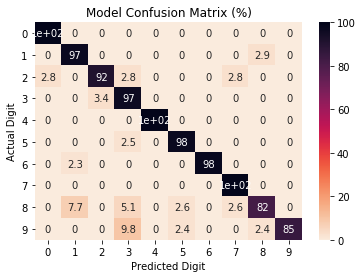

In [46]:
with sns.plotting_context(font_scale=3.2):
    sns_ax = sns.heatmap(pct_cm, cmap=sns.cm.rocket_r, annot=True)
    sns_ax.set(title='Model Confusion Matrix (%)', 
               xticklabels=(classes), yticklabels=(classes),
               xlabel='Predicted Digit', ylabel='Actual Digit'
              )
plt.yticks(rotation=0);

## Tune Model

### Hyperparameters

In [47]:
# number of trees in random forest
n_estimators = [10, 100, 500]
# maximum number of levels in tree
max_depth = [None, 3, 10]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 5]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [48]:
# define hyperparameter dictionary
hyperparams = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth,
    'bootstrap': bootstrap
}

In [49]:
rf = RandomForestClassifier(random_state=0)
rf_srch = RandomizedSearchCV(rf, hyperparams, scoring='accuracy', cv=5, random_state=0)
rf_srch.fit(X_train, y_train)
rf_srch.best_score_

0.97633959638135

In [46]:
rf_srch.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': True}

In [51]:
# create model with optimal hyperparameters
rf_tuned = RandomForestClassifier(
    n_estimators = rf_srch.best_params_['n_estimators'],
    min_samples_split = rf_srch.best_params_['min_samples_split'],
    min_samples_leaf = rf_srch.best_params_['min_samples_leaf'],
    max_depth = rf_srch.best_params_['max_depth'],
    bootstrap = rf_srch.best_params_['bootstrap'],
    random_state=0
)
rf_tuned.fit(X_train, y_train)
rf_tuned.score(X_test, y_test)

0.92

## Interpretation

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9225

In [31]:
# train score
knn.score(X_train, y_train)

0.9475

# SVM

In [32]:
from sklearn import svm

In [33]:
sv = svm.SVC()
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.1125

In [34]:
# train score
sv.score(X_train, y_train)

1.0

## Tune Model

# K-means
How well would an unsupervised, clustering model perform?

In [35]:
from sklearn.cluster import KMeans

In [47]:
km = KMeans(n_clusters=10)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
def map_labl(target_labels, km_labels):
    dig_dict = {}
    # iterate through each training label
    for label in np.unique(target_labels):
        try:
            # training index of digit label
            idx = np.where(target_labels == label)[0]
            # corresponding k-means label
            km_lab = stats.mode(km_labels[idx])[0][0]
            # map training label to k-means label
            dig_dict[int(label)] = km_lab
        except:
            # if no corresponding k-means label
            dig_dict[int(label)] = None
    return(dig_dict)

In [49]:
# train digit label mapped to k-means cluster label
dig_dict = map_labl(y, km.labels_)
dig_dict

{0: 8, 1: 1, 2: 9, 3: 3, 4: 5, 5: 3, 6: 0, 7: 7, 8: 2, 9: 5}

In [53]:
def acc_chk(target_labels, km_labels, dcty):
    crct_lst = []
    for label in np.unique(target_labels):
        crct_lst.append(sum(km_labels[np.where(y == label)] == dcty[label]))
    return(crct_lst)

In [54]:
acy = acc_chk(y, km.labels_, dig_dict)
acy

[103, 119, 134, 128, 118, 65, 152, 135, 108, 103]

In [55]:
# overall accuracy
sum(acy) / len(y)

0.5825

In [ ]:
# precision

In [ ]:
# recall

In [ ]:
# f-score

# Gradient Boosted Trees

In [12]:
from xgboost import XGBClassifier

In [13]:
xgb_clf = XGBClassifier(objective='multi:softmax', num_class=10)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=10,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [14]:
xgb_clf.score(X_train, y_train)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [15]:
xgb_clf.score(X_test, y_test)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9583333333333334

In [16]:
xgb_clf.feature_importances_

array([0.        , 0.00328003, 0.02336073, 0.00622204, 0.00515203,
       0.03743907, 0.0077517 , 0.        , 0.        , 0.00768826,
       0.01444961, 0.0026525 , 0.00970214, 0.01389492, 0.00435998,
       0.02150198, 0.        , 0.00490486, 0.00919741, 0.04580753,
       0.01672871, 0.04746587, 0.00666217, 0.        , 0.        ,
       0.00850591, 0.03719731, 0.01201062, 0.02871134, 0.0285568 ,
       0.01614627, 0.        , 0.        , 0.06365656, 0.0073202 ,
       0.01263778, 0.0563572 , 0.01954924, 0.03092655, 0.        ,
       0.        , 0.01028337, 0.03330006, 0.04049151, 0.01419807,
       0.02889602, 0.01163666, 0.        , 0.        , 0.00818539,
       0.00542815, 0.0112526 , 0.00820225, 0.02905157, 0.02220473,
       0.00055035, 0.        , 0.00179715, 0.01718934, 0.00605008,
       0.05697882, 0.01920549, 0.03665895, 0.02864213], dtype=float32)

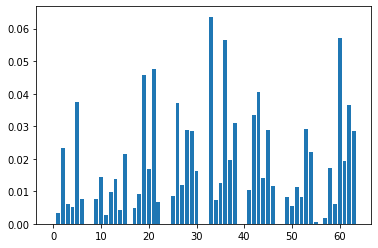

In [18]:
plt.bar(range(len(xgb_clf.feature_importances_)), xgb_clf.feature_importances_);

In [22]:
# retrieve performance metrics
results = xgb_clf.evals_result
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
# pyplot.show()

TypeError: 'method' object is not subscriptable

In [26]:
xgb_clf.evals_result

<bound method XGBClassifier.evals_result of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=10,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)>

## tune

In [64]:
xgb_tune = XGBClassifier(
    objective='multi:softmax', 
    num_class=10,
    learning_rate=0.01, 
    n_estimators=100, 
    max_depth=3, 
    subsample=0.8, 
    colsample_bytree=1, 
    gamma=1
)
xgb_tune.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=10,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.8, verbosity=1)

In [66]:
xgb_tune.score(X_train, y_train)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9505915100904663

In [67]:
xgb_tune.score(X_test, y_test)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9083333333333333

# Neural Network